<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Analytics/blob/main/Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Shape: (48895, 16)
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149           

<ipython-input-1-3598893078>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
<ipython-input-1-3598893078>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

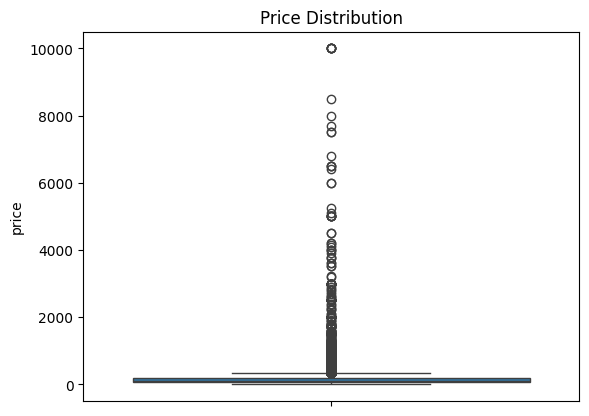

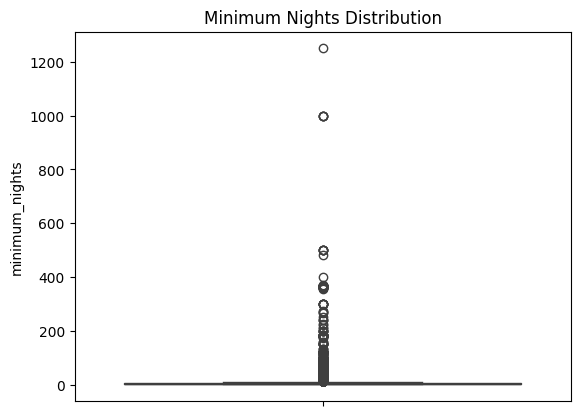


Cleaned Data Overview:
                  id                 name       host_id host_name  \
count   4.889500e+04                48895  4.889500e+04     48895   
unique           NaN                47470           NaN     11429   
top              NaN  home away from home           NaN   michael   
freq             NaN                   33           NaN       417   
mean    1.901714e+07                  NaN  6.762001e+07       NaN   
std     1.098311e+07                  NaN  7.861097e+07       NaN   
min     2.539000e+03                  NaN  2.438000e+03       NaN   
25%     9.471945e+06                  NaN  7.822033e+06       NaN   
50%     1.967728e+07                  NaN  3.079382e+07       NaN   
75%     2.915218e+07                  NaN  1.074344e+08       NaN   
max     3.648724e+07                  NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48895         48895  48895.000000  48895.000000   
uni

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------
# Load the dataset
# --------------------------
df = pd.read_csv("/content/AB_NYC_2019.csv")  # Ensure the file is in your working directory
print("Original Shape:", df.shape)
print(df.head())

# --------------------------
# 1. Understand the data
# --------------------------
print("\nColumn Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

# --------------------------
# 2. Handle missing data
# --------------------------
# 'name' and 'host_name' missing values can be filled with 'Unknown'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

# Drop 'reviews_per_month' missing as it's numeric and correlates with review count
df['reviews_per_month'].fillna(0, inplace=True)

# --------------------------
# 3. Remove duplicates
# --------------------------
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

# --------------------------
# 4. Standardize data formats
# --------------------------
# Convert all string columns to lowercase
string_cols = df.select_dtypes(include='object').columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.strip().str.lower())

# --------------------------
# 5. Outlier detection and handling
# --------------------------
# Check distribution of price
sns.boxplot(df['price'])
plt.title("Price Distribution")
plt.show()

# Cap price at 99th percentile
price_cap = df['price'].quantile(0.99)
df['price'] = np.where(df['price'] > price_cap, price_cap, df['price'])

# Check distribution of minimum_nights
sns.boxplot(df['minimum_nights'])
plt.title("Minimum Nights Distribution")
plt.show()

# Cap minimum nights at 95th percentile
min_nights_cap = df['minimum_nights'].quantile(0.95)
df['minimum_nights'] = np.where(df['minimum_nights'] > min_nights_cap, min_nights_cap, df['minimum_nights'])

# --------------------------
# 6. Final Data Check
# --------------------------
print("\nCleaned Data Overview:")
print(df.describe(include='all'))
print("\nMissing After Cleaning:\n", df.isnull().sum())

# --------------------------
# 7. Save cleaned dataset
# --------------------------
df.to_csv("cleaned_AB_NYC_2019.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_AB_NYC_2019.csv'")
